In [1]:
# !pip install numpy tqdm pandas matplotlib

In [6]:
from diezmil import JuegoDiezMil
from jugador import JugadorAleatorio, JugadorSiempreSePlanta
from template import JugadorEntrenado


jugador = JugadorAleatorio("random")
juego = JuegoDiezMil(jugador)
(cantidad_turnos, puntaje_final) = juego.jugar(verbose=True)
print(jugador.nombre, cantidad_turnos, puntaje_final)

jugador = JugadorSiempreSePlanta("plantón")
juego = JuegoDiezMil(jugador)
(cantidad_turnos, puntaje_final) = juego.jugar(verbose=True)
print(jugador.nombre, cantidad_turnos, puntaje_final)

jugador = JugadorEntrenado("Deep Purple 100k", "politica_100000.csv")
juego = JuegoDiezMil(jugador)
(cantidad_turnos, puntaje_final) = juego.jugar(verbose=True)
print(jugador.nombre, cantidad_turnos, puntaje_final)

jugador = JugadorEntrenado("Deep Purple 50k", "politica_50000.csv")
juego = JuegoDiezMil(jugador)
(cantidad_turnos, puntaje_final) = juego.jugar(verbose=True)
print(jugador.nombre, cantidad_turnos, puntaje_final)

turno 1: 163234 P --> 100 puntos. TOTAL: 100
turno 2: 242256 T(46)  42  --> 0 puntos. TOTAL: 100
turno 3: 552224 T(4)  4  --> 0 puntos. TOTAL: 100
turno 4: 144113 T(344)  454 T(44)  56 T(6)  1 T(123456)  522613 P --> 1350 puntos. TOTAL: 1450
turno 5: 213363 T(26)  61 T(6)  5 P --> 550 puntos. TOTAL: 2000
turno 6: 544551 T(44)  46  --> 0 puntos. TOTAL: 2000
turno 7: 522451 T(224)  334  --> 0 puntos. TOTAL: 2000
turno 8: 311353 P --> 550 puntos. TOTAL: 2550
turno 9: 461246 P --> 100 puntos. TOTAL: 2650
turno 10: 155532 T(23)  53 T(3)  6  --> 0 puntos. TOTAL: 2650
turno 11: 134266 T(23466)  42234  --> 0 puntos. TOTAL: 2650
turno 12: 223632 T(336)  324  --> 0 puntos. TOTAL: 2650
turno 13: 413224 T(22344)  63516 T(366)  463  --> 0 puntos. TOTAL: 2650
turno 14: 432645 T(23446)  32266  --> 0 puntos. TOTAL: 2650
turno 15: 563263 T(23366)  62664 T(24)  25 T(2)  2  --> 0 puntos. TOTAL: 2650
turno 16: 155214 P --> 300 puntos. TOTAL: 2950
turno 17: 331222 T(33)  25 T(2)  1 P --> 450 puntos. TOTAL:

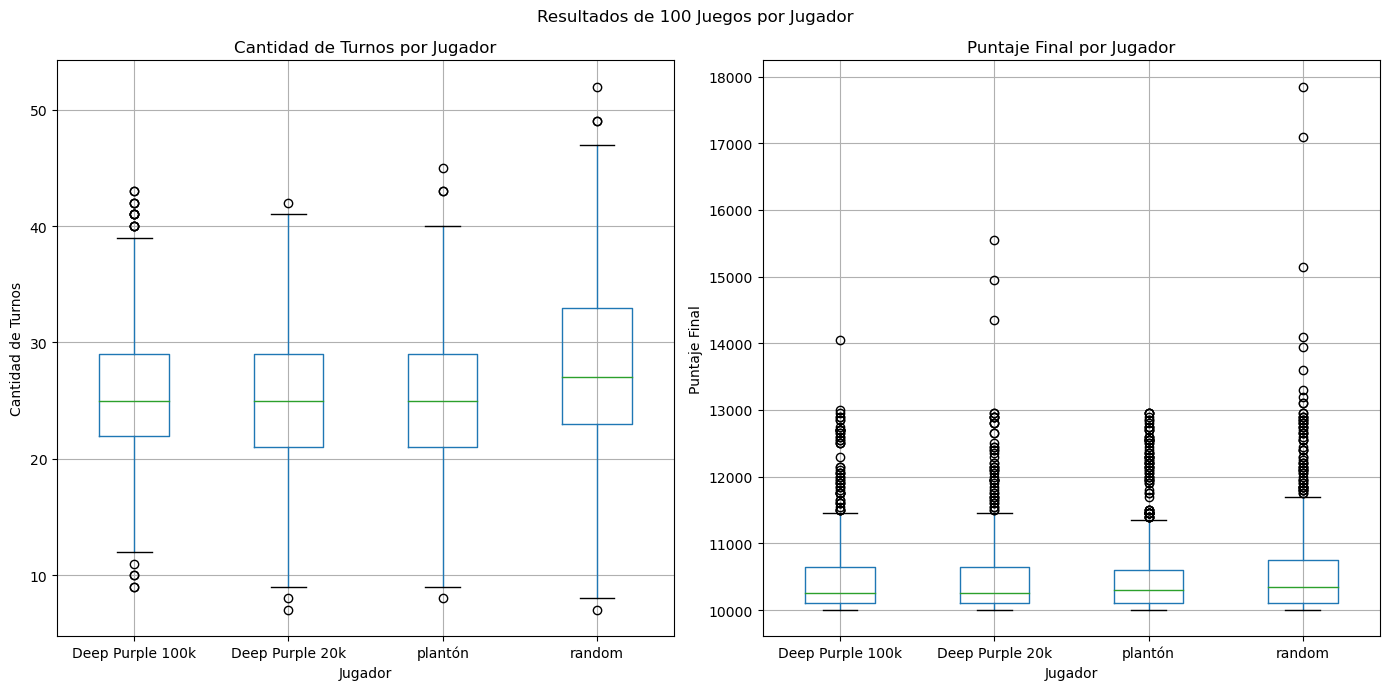

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Definir los jugadores
jugadores = [
    ("JugadorAleatorio", "random"),
    ("JugadorSiempreSePlanta", "plantón"),
    ("JugadorEntrenado", "Deep Purple 20k", "politica_20000.csv"),
    ("JugadorEntrenado", "Deep Purple 100k", "politica_100000.csv")
]

# Inicializar una lista para almacenar los resultados
resultados = []
n_sims = 1000

# Simular 100 juegos para cada jugador
for jugador_info in jugadores:
    for _ in range(n_sims):
        if len(jugador_info) == 2:
            jugador = globals()[jugador_info[0]](jugador_info[1])
        else:
            jugador = globals()[jugador_info[0]](jugador_info[1], jugador_info[2])

        juego = JuegoDiezMil(jugador)
        cantidad_turnos, puntaje_final = juego.jugar(verbose=False)
        resultados.append(
            {
                "jugador": jugador.nombre,
                "cantidad_turnos": cantidad_turnos,
                "puntaje_final": puntaje_final,
            }
        )

# Convertir los resultados a un DataFrame
df_resultados = pd.DataFrame(resultados)

# Graficar los resultados
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Graficar la cantidad de turnos
df_resultados.boxplot(column="cantidad_turnos", by="jugador", ax=axes[0])
axes[0].set_title("Cantidad de Turnos por Jugador")
axes[0].set_xlabel("Jugador")
axes[0].set_ylabel("Cantidad de Turnos")

# Graficar el puntaje final
df_resultados.boxplot(column="puntaje_final", by="jugador", ax=axes[1])
axes[1].set_title("Puntaje Final por Jugador")
axes[1].set_xlabel("Jugador")
axes[1].set_ylabel("Puntaje Final")

plt.suptitle("Resultados de 100 Juegos por Jugador")
plt.tight_layout()
plt.show()